<a href="https://colab.research.google.com/github/maaliskuussa/main/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score 
import pickle
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, LeakyReLU

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.models import Sequential
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings("ignore")

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# загрузим подготовленный на предыдущем этапе датасет (объединенный, очищенный от шумов и выбросов)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Копия1 X_CLEAR.xlsx') 

In [ ]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


# **Модель предсказания Соотношение матрица-наполнитель**

В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (**mae**) и коэффициент детерминации (**R2**)

In [ ]:
# хранение оценок моделей
# y1 - Соотношение матрица-наполнитель

MAE=[]

Выделение предикторов и целевых переменных

In [ ]:
y = df[['Соотношение матрица-наполнитель']]
y.head()

,Соотношение матрица-наполнитель
0,1.857143
1,1.857143
2,2.771331
3,2.767918
4,2.569620


In [ ]:
X = df.drop(columns=['Соотношение матрица-наполнитель'], axis=1)
X.head(5).style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.4f}')

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.0000,738.7368,50.0000,23.7500,284.6154,210.0000,70.0000,3000.0000,220.0000,0.0000,4.0000,60.0000
1,2030.0000,738.7368,129.0000,21.2500,300.0000,210.0000,70.0000,3000.0000,220.0000,0.0000,5.0000,47.0000
2,2030.0000,753.0000,111.8600,22.2679,284.6154,210.0000,70.0000,3000.0000,220.0000,0.0000,5.0000,57.0000
3,2000.0000,748.0000,111.8600,22.2679,284.6154,210.0000,70.0000,3000.0000,220.0000,0.0000,5.0000,60.0000
4,1910.0000,807.0000,111.8600,22.2679,284.6154,210.0000,70.0000,3000.0000,220.0000,0.0000,5.0000,70.0000


In [ ]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# попробуем нормализацию  данных с помощью MinMaxScaler
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [ ]:
#разбиение нормализованных данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
df.shape[0] - X_train_norm.shape[0] - X_test_norm.shape[0]

0

In [ ]:
X_train_norm.shape

(700, 12)

In [ ]:
X_test_norm.shape

(300, 12)

In [ ]:
y_train_norm.shape


(700, 1)

In [ ]:
y_test_norm.shape

(300, 1)

In [ ]:
X_train_norm.describe().T.style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.4f}')

,count,mean,std,min,25%,50%,75%,max
"Плотность, кг/м3",700.0000,0.4600,0.1792,0.0000,0.3315,0.4561,0.5773,1.0000
"модуль упругости, ГПа",700.0000,0.4470,0.1980,0.0000,0.3009,0.4471,0.5790,1.0000
"Количество отвердителя, м.%",700.0000,0.5044,0.1722,0.0225,0.3860,0.5046,0.6207,1.0000
"Содержание эпоксидных групп,%_2",700.0000,0.4890,0.1761,0.0000,0.3700,0.4869,0.6177,0.9964
"Температура вспышки, С_2",700.0000,0.4908,0.1766,0.0021,0.3703,0.4906,0.6092,1.0000
"Поверхностная плотность, г/м2",700.0000,0.3728,0.2156,0.0008,0.2064,0.3586,0.5319,0.9979
"Модуль упругости при растяжении, ГПа",700.0000,0.5016,0.1680,0.0000,0.3900,0.5002,0.6150,0.9761
"Прочность при растяжении, МПа",700.0000,0.5094,0.1755,0.0122,0.3909,0.5047,0.6207,1.0000
"Потребление смолы, г/м2",700.0000,0.5083,0.1680,0.0000,0.3932,0.5074,0.6198,1.0000
"Угол нашивки, град",700.0000,0.4957,0.5003,0.0000,0.0000,0.0000,1.0000,1.0000


Так выглядело до нормализации

In [ ]:
X_train.describe().T.style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.4f}')

,count,mean,std,min,25%,50%,75%,max
"Плотность, кг/м3",700.0000,1972.2865,73.1483,1784.4822,1919.8335,1970.7075,2020.1886,2192.7388
"модуль упругости, ГПа",700.0000,738.6276,326.1306,2.4369,498.0316,738.8470,955.9619,1649.4157
"Количество отвердителя, м.%",700.0000,112.1192,28.0565,33.6242,92.8415,112.1462,131.0734,192.8517
"Содержание эпоксидных групп,%_2",700.0000,22.1791,2.3351,15.6959,20.6023,22.1514,23.8864,28.9075
"Температура вспышки, С_2",700.0000,286.4496,40.6451,173.9739,258.7142,286.3969,313.6955,403.6529
"Поверхностная плотность, г/м2",700.0000,481.8059,278.2536,1.6680,266.9787,463.5063,687.1801,1288.6918
"Модуль упругости при растяжении, ГПа",700.0000,73.3988,3.1286,64.0541,71.3196,73.3722,75.5102,82.2376
"Прочность при растяжении, МПа",700.0000,2469.1092,493.5317,1071.1238,2135.8861,2455.9745,2782.1120,3848.4367
"Потребление смолы, г/м2",700.0000,216.8385,58.1081,41.0483,177.0368,216.5419,255.4087,386.9034
"Угол нашивки, град",700.0000,0.4957,0.5003,0.0000,0.0000,0.0000,1.0000,1.0000


# **Полносвязная нейронная сеть**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 1s - loss: 0.0424 - mae: 0.1652 - val_loss: 0.0279 - val_mae: 0.1360 - 1s/epoch - 65ms/step
Epoch 2/150
20/20 - 0s - loss: 0.0387 - mae: 0.1583 - val_loss: 0.0262 - val_m

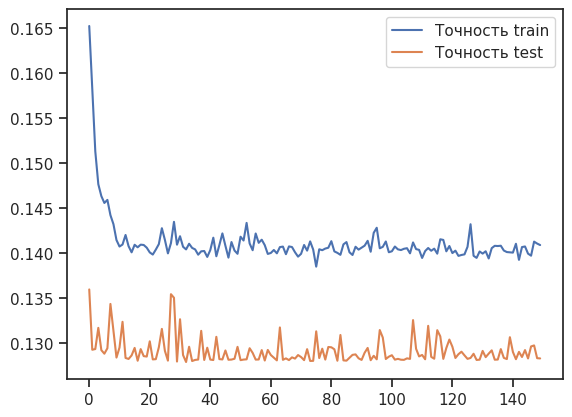

In [ ]:
# модель полносвязной нейронной сети для целевой переменной y1
modelNN_y = Sequential()
modelNN_y.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y.add(Dropout(0.5))
modelNN_y.add(Dense(32, activation = 'sigmoid'))
modelNN_y.add(Dense(1, activation = 'tanh'))
modelNN_y.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y.summary()
history = modelNN_y.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 2s - loss: 0.0591 - mae: 0.1949 - val_loss: 0.0299 - val_mae: 0.1404 - 2s/epoch - 90ms/step
Epoch 2/150
20/20 - 0s - loss: 0.0502 - mae: 0.1786 - val_loss: 0.0268 - val

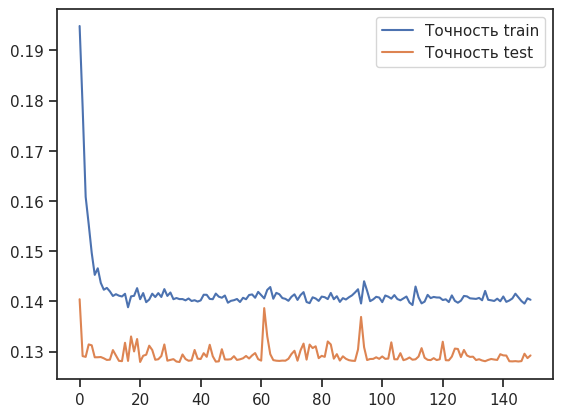

In [ ]:
# модель полносвязной нейронной сети тренируем на нормализованных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y1.add(Dropout(0.5))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'relu'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                416       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                

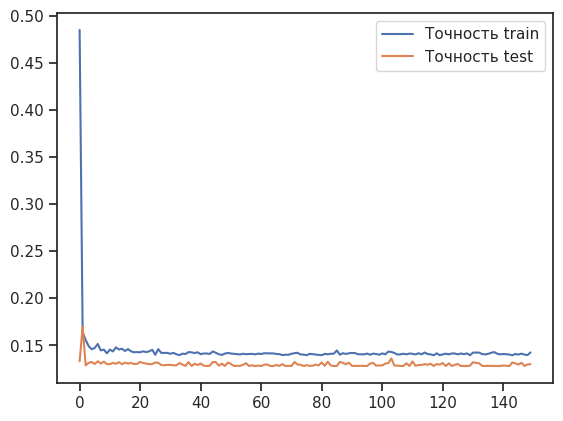

In [ ]:
# модель полносвязной нейронной сети тренируем на нормализованных данных
modelNN_y2 = Sequential([
                Dense(32,  input_dim=12, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                208       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-traina

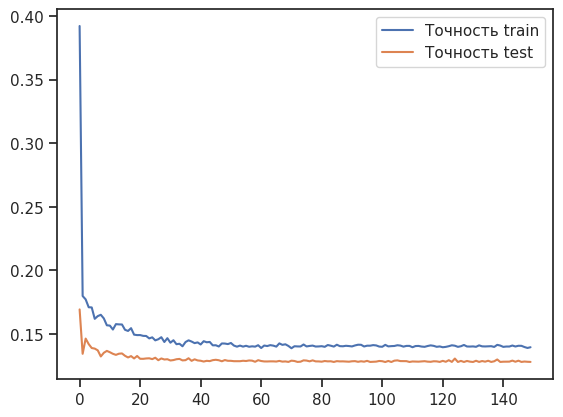

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y3 тренируем на нормализованных данных
modelNN_y3 = Sequential()
modelNN_y3.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
modelNN_y3.add(Dropout(0.5))
modelNN_y3.add(Dense(32, activation = 'sigmoid'))
modelNN_y3.add(Dropout(0.5))
modelNN_y3.add(Dense(16, activation = 'sigmoid'))
modelNN_y3.add(Dense(1, activation = 'tanh'))
modelNN_y3.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y3.summary()
history = modelNN_y3.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

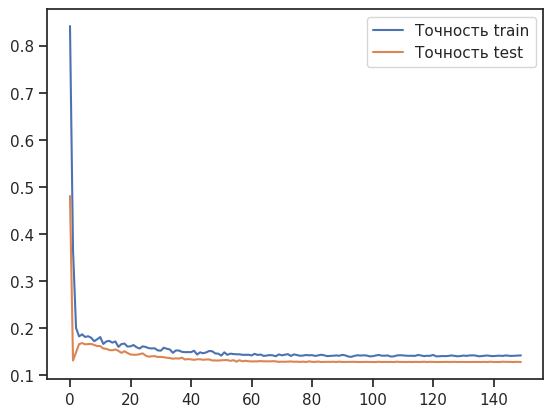

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y4 тренируем на нормализованных данных
modelNN_y4 = Sequential()
modelNN_y4.add(Dense(64,  input_dim=12, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(32, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(16, activation = 'sigmoid'))
modelNN_y4.add(Dense(1, activation = 'tanh'))
modelNN_y4.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y4.summary()
history = modelNN_y4.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               1664      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)               

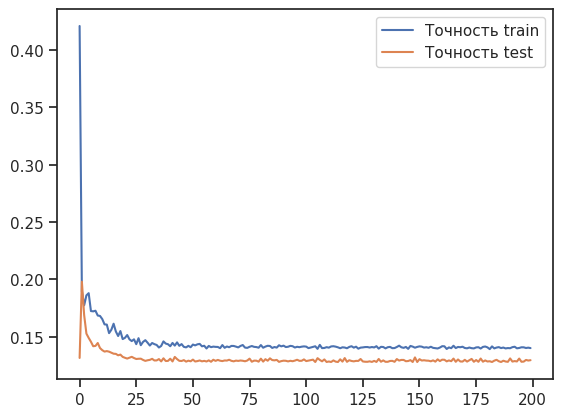

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y4 тренируем на нормализованных данных
modelNN_y4 = Sequential()
modelNN_y4.add(Dense(128,  input_dim=12, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(64, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(32, activation = 'sigmoid'))
modelNN_y4.add(Dropout(0.5))
modelNN_y4.add(Dense(16, activation = 'sigmoid'))
modelNN_y4.add(Dense(1, activation = 'tanh'))
modelNN_y4.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y4.summary()
history = modelNN_y4.fit(X_train_norm,y_train_norm, 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               1300      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
 dense_27 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

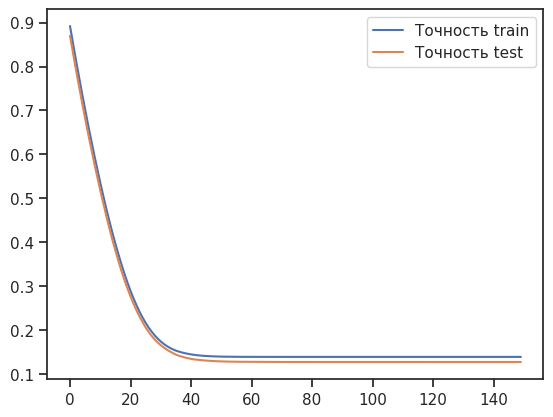

In [ ]:
# 5 
model_y5= Sequential()
model_y5.add(Dense(100, input_dim=12, activation='sigmoid'))
model_y5.add(LeakyReLU(alpha=1.0))
model_y5.add(Dense(50, activation='sigmoid'))
model_y5.add(LeakyReLU(alpha=1.0))
model_y5.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model_y5.add(Dense(1, activation='linear'))
model_y5.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y5.summary()
history = model_y5.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1300      
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_30 (Dense)            (None, 25)                1275      
                                                                 
 dense_31 (Dense)            (None, 1)                

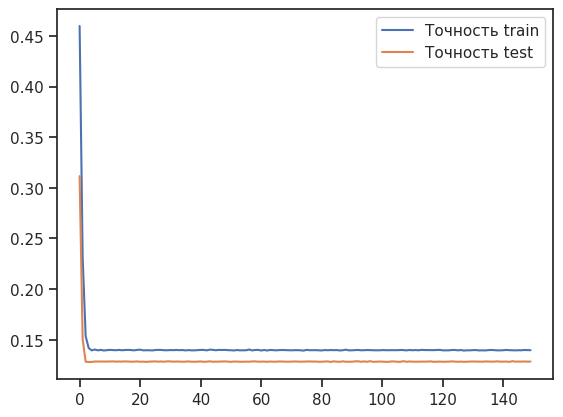

In [ ]:
# 6
model_y6= Sequential()
model_y6.add(Dense(100, input_dim=12, activation='sigmoid'))
model_y6.add(Dropout(0.5))
model_y6.add(LeakyReLU(alpha=1.0))
model_y6.add(Dense(50, activation='sigmoid'))
model_y6.add(LeakyReLU(alpha=1.0))
model_y6.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y6.add(Dense(1, activation='linear'))
model_y6.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y6.summary()
history = model_y6.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                208       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 1s - loss: 0.3233 - mae: 0.5161 - va

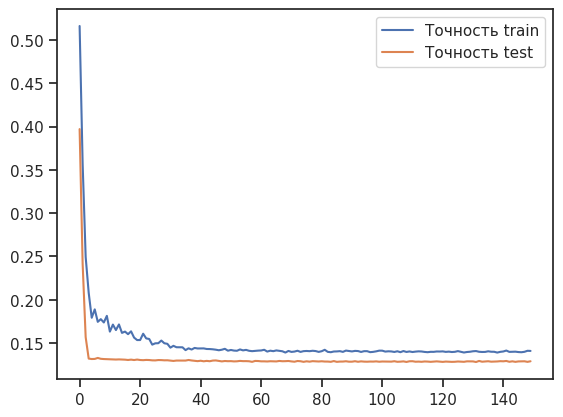

In [ ]:
# 7
model_y7= Sequential()
model_y7.add(Dense(16, input_dim=12, activation='sigmoid'))
model_y7.add(Dropout(0.5))
model_y7.add(LeakyReLU(alpha=1.0))
model_y7.add(Dense(8, activation='sigmoid'))

#IMPORTANT PART
model_y7.add(Dense(1, activation='linear'))
model_y7.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y7.summary()
history = model_y7.fit(X_train_norm,y_train_norm, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pred = modelNN_y.predict(X_test_norm)
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)
y_pred_3 = modelNN_y3.predict(X_test_norm)
y_pred_4 = modelNN_y4.predict(X_test_norm)
y_pred_5 = model_y5.predict(X_test_norm)
y_pred_6 = model_y6.predict(X_test_norm)
y_pred_7 = model_y7.predict(X_test_norm)

y_pred = scaler_norm_y.inverse_transform (y_pred)
y_pred1 = scaler_norm_y.inverse_transform (y_pred_1)
y_pred2 = scaler_norm_y.inverse_transform (y_pred_2)
y_pred3 = scaler_norm_y.inverse_transform (y_pred_3)
y_pred4 = scaler_norm_y.inverse_transform (y_pred_4)
y_pred5 = scaler_norm_y.inverse_transform (y_pred_5)
y_pred6 = scaler_norm_y.inverse_transform (y_pred_6)
y_pred7 = scaler_norm_y.inverse_transform (y_pred_7)

MAE_0 = mean_absolute_error(y_test,y_pred)
print (MAE_0)
MAE_1 = mean_absolute_error(y_test,y_pred1)
print (MAE_1)
MAE_2 = mean_absolute_error(y_test,y_pred2)
print (MAE_2)
MAE_3 = mean_absolute_error(y_test,y_pred3)
print (MAE_3)
MAE_4 = mean_absolute_error(y_test,y_pred4)
print (MAE_4)
MAE_5 = mean_absolute_error(y_test,y_pred5)
print (MAE_5)
MAE_6 = mean_absolute_error(y_test,y_pred6)
print (MAE_6)
MAE_7 = mean_absolute_error(y_test,y_pred7)
print (MAE_7)

10/10 [==============================] - 0s 2ms/step
0.7363657054215353
0.7429863618259119
0.7507257556551467
0.7381061820379768
0.7485890578859816
0.7390058728249743
0.7405408752155179
0.7431421636440246


In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE.append(['Нейросеть 0',MAE_0])
MAE.append(['Нейросеть 1',MAE_1])
MAE.append(['Нейросеть 2',MAE_2])
MAE.append(['Нейросеть 3',MAE_3])
MAE.append(['Нейросеть 4',MAE_4])
MAE.append(['Нейросеть 5',MAE_5])
MAE.append(['Нейросеть 6',MAE_6])
MAE.append(['Нейросеть 7',MAE_7])

In [ ]:
# Результаты расчета ошибок нейросетей при предсказании целевого признака "Соотношение матрица-наполнитель"
MAE

[['Нейросеть 0', 0.7363657054215353],
 ['Нейросеть 1', 0.7429863618259119],
 ['Нейросеть 2', 0.7507257556551467],
 ['Нейросеть 3', 0.7381061820379768],
 ['Нейросеть 4', 0.7485890578859816],
 ['Нейросеть 5', 0.7390058728249743],
 ['Нейросеть 6', 0.7405408752155179],
 ['Нейросеть 7', 0.7431421636440246]]

In [ ]:
#  результаты MAE
a = np.array(MAE)

MAE_errors = pd.DataFrame({'Версия нейросети': a[:,0], 'MAE Соотношение матрица-наполнитель': a[:,1]})
MAE_errors = MAE_errors.astype({'MAE Соотношение матрица-наполнитель': np.float16})
MAE_errors

,Версия нейросети,MAE Соотношение матрица-наполнитель
0,Нейросеть 0,0.736328
1,Нейросеть 1,0.743164
2,Нейросеть 2,0.750488
3,Нейросеть 3,0.738281
4,Нейросеть 4,0.748535
5,Нейросеть 5,0.738770
6,Нейросеть 6,0.740723
7,Нейросеть 7,0.743164


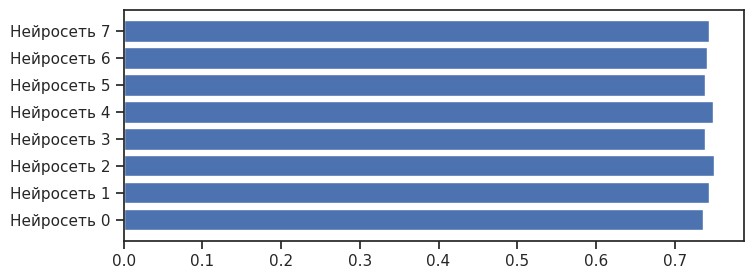

In [ ]:
# Гистограмма распределения ошибки
plt.figure(figsize=(8, 3))
plt.barh(MAE_errors['Версия нейросети'], MAE_errors['MAE Соотношение матрица-наполнитель'])
plt.show()

In [54]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('/content/drive/MyDrive/Colab Notebooks/dataset/MAE_errors.xlsx', index=0)


In [55]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/dataset/R2_errors.xlsx', index=0)

In [ ]:
model_y5.save('mn_model_nn')

In [56]:
model_y5.save('/content/drive/MyDrive/Colab Notebooks/mn_model_nn')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 100)               1300      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 51        
                                                                 
 dense_38 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

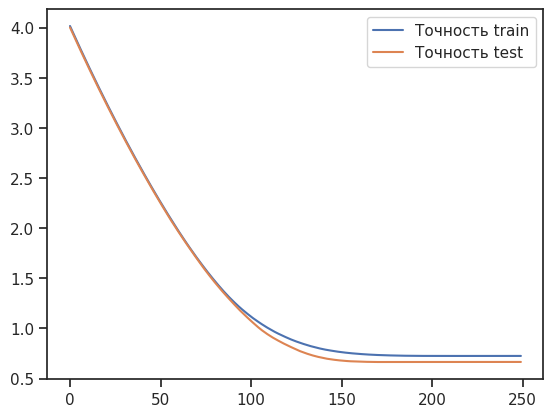

In [ ]:
# НС на исходных очищенных данных (не нормализованных) 
model= Sequential()
model.add(Dense(100, input_dim=12, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(50, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
history = model.fit(X_train,y_train, 
                    epochs=250, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pr = model.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr)
print (MAE)

10/10 [==============================] - 0s 2ms/step
0.739148881057091


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/mn_model_nn1')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                416       
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 - 2s - loss: 6.9055 - mae: 2.4533 - v

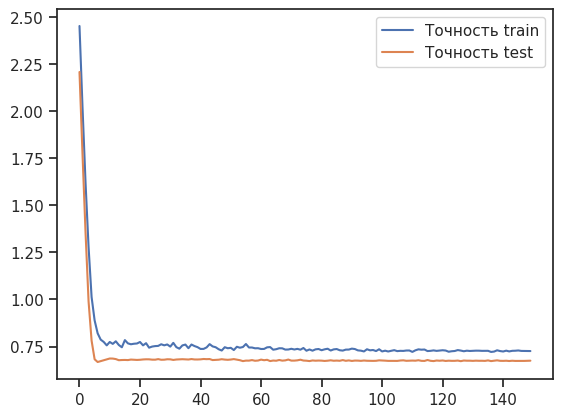

In [ ]:
# 8
model_y8= Sequential()
model_y8.add(Dense(32, input_dim=12, activation='sigmoid'))
model_y8.add(Dropout(0.5))
model_y8.add(LeakyReLU(alpha=1.0))
model_y8.add(Dense(16, activation='sigmoid'))

#IMPORTANT PART
model_y8.add(Dense(1, activation='linear'))
model_y8.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y8.summary()
history = model_y8.fit(X_train,y_train, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pr8 = model_y8.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr8)
print (MAE)

10/10 [==============================] - 0s 2ms/step
0.7428098056268093


In [ ]:
model_y8.save('mn_model_nn8')

In [ ]:
model_y8.save('/content/drive/MyDrive/Colab Notebooks/mn_model_nn8')